# 빌보드 차트(HOT100) 크롤링 과정

In [3]:

# 데이터 크롤링 과제(12163252 신효근)
# 빌보드 HOT100차트 크롤링 및 대략적 통계량 분석
# 이후에 진행되는 코드는 20년 11월 16일의 HOT100 차트(11월 3째 주)를 바탕으로 합니다.


import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pylab as plt

In [4]:
webpage = requests.get("https://www.billboard.com/charts/hot-100")
soup = BeautifulSoup(webpage.content, "html.parser")
DATA = {}

In [5]:
tag_class_dictionary = {
                        "순위":"RANK",
                        "노래제목":".chart-element__information__song",
                        "가수":".chart-element__information__artist",
                        "지난주 순위":".text--last",
                        "최고순위":".text--peak",
                        "HOT100에 들었던 기간":".text--week"
                        }

In [6]:
for key in tag_class_dictionary.keys():
    new = []
    
    if key in ["지난주 순위","최고순위","HOT100에 들었던 기간"]:
        col = soup.select(tag_class_dictionary[key])
        for i in col:
            if col.index(i) % 2 != 0:
                new.append(i.get_text())
    elif key == "순위":
        for i in range(100):
            new.append(i+1)
    else:
        col = soup.select(tag_class_dictionary[key])
        for i in col:
            new.append(i.get_text())
            
    DATA[key] = new
    
df1 = pd.DataFrame(DATA)
df1.to_csv('DATA.csv')
df1

,순위,노래제목,가수,지난주 순위,최고순위,HOT100에 들었던 기간
0,1,Mood,24kGoldn Featuring iann dior,3,1,13
1,2,Positions,Ariana Grande,1,1,2
2,3,Laugh Now Cry Later,Drake Featuring Lil Durk,4,2,12
3,4,Blinding Lights,The Weeknd,5,1,49
4,5,I Hope,Gabby Barrett Featuring Charlie Puth,6,5,45
...,...,...,...,...,...,...
95,96,Happy Does,Kenny Chesney,92,85,3
96,97,So Done,The Kid LAROI,77,77,2
97,98,Thick,DJ Chose Featuring BeatKing,-,98,1
98,99,La Toxica,Farruko,98,98,2


# 빌보드 차트(HOT100) 크롤링 결과(df1)을 이용한 통계량 분석

In [7]:
# 1. HOT100에 오른 100개의 노래들의 평균 "HOT100에 들었던 기간"은 ?

answer = sum(map(int,df1["HOT100에 들었던 기간"]))/100

answer

11.86

In [8]:
# 2. 이번주 순위와 지난주 순위의 차이의 평균(평균적으로 얼마간의 변동이 있었을까?)과 분산
# 단! 이번주에 갑작스럽게 빌보드 차트에 진입한 노래들은 제외합니다.

last_rank = df1["지난주 순위"]
rank = df1["순위"]
rank_minus_last_rank = []
compare = []
for i in range(100):
    if last_rank[i] != "-":
        rank_minus_last_rank.append(int(rank[i]) - int(last_rank[i]))
        compare.append(i+1)

answer_mean = sum(rank_minus_last_rank)/len(rank_minus_last_rank)
answer_var = sum([(answer_mean-i)**2 for i in rank_minus_last_rank]) / len(rank_minus_last_rank)

answer_mean
answer_var

#평균적으로 4.6등이 지난주에 비해 감소했다.(분산은 대략 49.87)

49.8686175887822

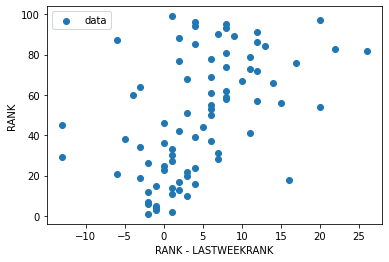

In [12]:
# 3-1)이번주 순위와 "이번주 순위-지난주 순위"간의 산점도
plt.scatter(rank_minus_last_rank, compare, label = "data")

plt.legend(loc = "best")
plt.xlabel('RANK - LASTWEEKRANK')
plt.ylabel("RANK")
plt.show()
